In [1]:
import tensorflow as tf
print(tf.__version__)
print(tf.config.list_physical_devices('GPU'))

c:\Users\G6X\.conda\envs\test_py_3_9_gui\lib\site-packages\tensorflow\python\keras\engine\training_arrays_v1.py:37: UserWarning: A NumPy version >=1.22.4 and <2.3.0 is required for this version of SciPy (detected version 1.21.6)
  from scipy.sparse import issparse  # pylint: disable=g-import-not-at-top


2.8.1
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [1]:
import cv2
import shapely
import flask
import importlib.metadata

print('opencv ver',cv2.__version__)
print('shapely ver',shapely.__version__)
print('flask ver',importlib.metadata.version('flask'))

opencv ver 4.11.0
shapely ver 2.0.7
flask ver 3.1.0


In [2]:
import tensorflow as tf

# กำหนด path ของ train.record และ val.record
train_record_path = "D:/TNI-works/CPE-431/lab6/models-master/ssd_mobilenet_v2/train/train.record"
val_record_path = "D:/TNI-works/CPE-431/lab6/models-master/ssd_mobilenet_v2/train/val.record"

def inspect_tfrecord(record_path, num_samples=3):
    raw_dataset = tf.data.TFRecordDataset(record_path)
    
    feature_description = {
        'image/encoded': tf.io.FixedLenFeature([], tf.string),
        'image/object/class/label': tf.io.VarLenFeature(tf.int64),
        'image/filename': tf.io.FixedLenFeature([], tf.string, default_value=''),
        'image/format': tf.io.FixedLenFeature([], tf.string, default_value=''),
    }

    for raw_record in raw_dataset.take(num_samples):
        example = tf.io.parse_single_example(raw_record, feature_description)
        print(f"📂 Filename: {example['image/filename'].numpy().decode('utf-8')}")
        print(f"🖼️ Format: {example['image/format'].numpy().decode('utf-8')}")
        print(f"🏷️ Labels: {example['image/object/class/label'].values.numpy()}")
        print("-----------------------------------------------------")

# 🔍 ตรวจสอบ train.record
print("🔍 Checking train.record:")
inspect_tfrecord(train_record_path)

# 🔍 ตรวจสอบ val.record
print("\n🔍 Checking val.record:")
inspect_tfrecord(val_record_path)


🔍 Checking train.record:
📂 Filename: Ac-N001_jpg.rf.15324ca6ccd9795eed6aa497c0fca222.jpg
🖼️ Format: jpeg
🏷️ Labels: [1]
-----------------------------------------------------
📂 Filename: Ac-N001_jpg.rf.16b68dde5c711cd28aae3f48e505014e.jpg
🖼️ Format: jpeg
🏷️ Labels: [1]
-----------------------------------------------------
📂 Filename: Ac-N001_jpg.rf.53deea78f8048862a06b14a56a17d7cd.jpg
🖼️ Format: jpeg
🏷️ Labels: [1]
-----------------------------------------------------

🔍 Checking val.record:
📂 Filename: Ac-N001_jpg.rf.15324ca6ccd9795eed6aa497c0fca222.jpg
🖼️ Format: jpeg
🏷️ Labels: [1]
-----------------------------------------------------
📂 Filename: Ac-N002_jpg.rf.0ad36e2fe1636619d56de3717cb28f49.jpg
🖼️ Format: jpeg
🏷️ Labels: [1]
-----------------------------------------------------
📂 Filename: Ac-N003_jpg.rf.0990114c60d23c6c079fca7a2ced13e4.jpg
🖼️ Format: jpeg
🏷️ Labels: [1]
-----------------------------------------------------


In [4]:
import tensorflow as tf

# กำหนด path ของ train.record และ val.record
train_record_path = "D:/TNI-works/CPE-431/lab6/models-master/ssd_mobilenet_v2/train/train.record"
val_record_path = "D:/TNI-works/CPE-431/lab6/models-master/ssd_mobilenet_v2/train/val.record"

# ฟังก์ชันสำหรับอ่าน TFRecord
def parse_tfrecord_fn(example):
    feature_description = {
        'image/encoded': tf.io.FixedLenFeature([], tf.string),
        'image/object/class/label': tf.io.VarLenFeature(tf.int64)
    }
    example = tf.io.parse_single_example(example, feature_description)
    labels = tf.sparse.to_dense(example['image/object/class/label'])
    return labels  # Return แค่ Labels

# โหลดข้อมูล TFRecord และ Parse
parsed_train_dataset = tf.data.TFRecordDataset(train_record_path).map(parse_tfrecord_fn)
parsed_val_dataset = tf.data.TFRecordDataset(val_record_path).map(parse_tfrecord_fn)

# ตรวจสอบจำนวนคลาสที่มีใน TFRecord
unique_labels_train = set()
unique_labels_val = set()

for labels in parsed_train_dataset:
    unique_labels_train.update(labels.numpy())

for labels in parsed_val_dataset:
    unique_labels_val.update(labels.numpy())

print("🔍 Train labels:", unique_labels_train)
print("🔍 Val labels:", unique_labels_val)


🔍 Train labels: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11}
🔍 Val labels: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11}


In [5]:
feature_description = {
    'image/encoded': tf.io.FixedLenFeature([], tf.string),
    'image/object/bbox/xmin': tf.io.VarLenFeature(tf.float32),
    'image/object/bbox/xmax': tf.io.VarLenFeature(tf.float32),
    'image/object/bbox/ymin': tf.io.VarLenFeature(tf.float32),
    'image/object/bbox/ymax': tf.io.VarLenFeature(tf.float32),
    'image/object/class/label': tf.io.VarLenFeature(tf.int64)
}


In [17]:
import tensorflow as tf

train_record_path = "D:/TNI-works/CPE-431/lab6/models-master/ssd_mobilenet_v3/train/train.record"
val_record_path = "D:/TNI-works/CPE-431/lab6/models-master/ssd_mobilenet_v3/train/val.record"

def count_records(tfrecord_path):
    count = sum(1 for _ in tf.data.TFRecordDataset(tfrecord_path))
    return count

print(f"📊 Train samples: {count_records(train_record_path)}")
print(f"📊 Val samples: {count_records(val_record_path)}")


📊 Train samples: 8427
📊 Val samples: 1123


In [16]:
import os
import xml.etree.ElementTree as ET
from collections import defaultdict

dataset_path = r"D:\TNI-works\CPE-431\lab6\models-master\research\data3"
folders = ["train/annotations", "val/annotations"]  # เปลี่ยนให้ชี้ไปที่โฟลเดอร์ annotations

class_counts = defaultdict(int)

# อ่านไฟล์ .xml ในโฟลเดอร์ที่ถูกต้อง
for folder in folders:
    folder_path = os.path.join(dataset_path, folder)
    
    if os.path.exists(folder_path):
        for file in os.listdir(folder_path):
            if file.endswith(".xml"):
                xml_path = os.path.join(folder_path, file)
                tree = ET.parse(xml_path)
                root = tree.getroot()
                
                # อ่านชื่อคลาสจาก <object><name>
                for obj in root.findall("object"):
                    class_name = obj.find("name").text
                    class_counts[class_name] += 1
    else:
        print(f"❌ ไม่พบโฟลเดอร์ {folder_path}")

# แสดงผลลัพธ์
if class_counts:
    for class_name, count in class_counts.items():
        print(f"{class_name}: {count} images")
else:
    print("❌ ไม่พบข้อมูลคลาสในไฟล์ XML")


Ac: 852 images
Cu: 884 images
As: 884 images
Cb: 854 images
Cc: 914 images
Ci: 826 images
Cs: 842 images
Ct: 826 images
Ns: 868 images
Sc: 918 images
St: 882 images


  Bounding Box (pixels): [21, 61, 395, 341]


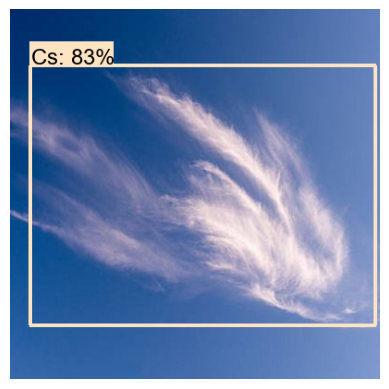

✅ อันดับ 1: Cs (Score: 82.99%)
✅ อันดับ 2: Cb (Score: 7.53%)


In [3]:
import tensorflow as tf
import numpy as np
import cv2
from object_detection.utils import label_map_util, visualization_utils as viz_utils
import matplotlib.pyplot as plt
%matplotlib inline

# Load the saved model
SAVED_MODEL_PATH = "D:/TNI-works/CPE-431/lab6/exported_model_v13/saved_model"

detect_fn = tf.saved_model.load(SAVED_MODEL_PATH)

# Load the label map
LABEL_MAP_PATH = "D:/TNI-works/CPE-431/lab6/models-master/ssd_mobilenet_v3/train/label_map.pbtxt"
category_index = label_map_util.create_category_index_from_labelmap(LABEL_MAP_PATH, use_display_name=True)

# Function to load and preprocess an image
def load_image_into_numpy_array(image_path):
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    return image_rgb

# Path to the test image
IMAGE_PATH = r'D:/TNI-works/CPE-431/Cloud_image_classification_Dataset/data/test/132.jpg'
image_np = load_image_into_numpy_array(IMAGE_PATH)

# Run inference
input_tensor = tf.convert_to_tensor(image_np)
input_tensor = input_tensor[tf.newaxis, ...]  # Add batch dimension
detections = detect_fn(input_tensor)

# Process the detections
num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy() for key, value in detections.items()}
detections['num_detections'] = num_detections

# Convert detection classes to integers
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

# Visualization
viz_utils.visualize_boxes_and_labels_on_image_array(
    image_np,
    detections['detection_boxes'],
    detections['detection_classes'],
    detections['detection_scores'],
    category_index,
    use_normalized_coordinates=True,
    max_boxes_to_draw=50,
    min_score_thresh=0.5,  # Adjust this threshold as needed
    agnostic_mode=False
)
# Extract the height and width of the image
image_height, image_width, _ = image_np.shape

# Iterate through detection boxes, classes, and scores
for i in range(num_detections):
    # Only consider detections above the threshold (e.g., 0.5)
    if detections['detection_scores'][i] >= 0.5:
        # Get normalized coordinates
        ymin, xmin, ymax, xmax = detections['detection_boxes'][i]

        # Convert normalized coordinates to pixel values
        xmin_pixel = int(xmin * image_width)
        xmax_pixel = int(xmax * image_width)
        ymin_pixel = int(ymin * image_height)
        ymax_pixel = int(ymax * image_height)
        print(f"  Bounding Box (pixels): [{xmin_pixel}, {ymin_pixel}, {xmax_pixel}, {ymax_pixel}]")

# Display the image with detections
#plt.figure(figsize=(12, 8))
plt.imshow(image_np)
plt.axis('off')
plt.show()

##################################################
# ค้นหาคลาสที่ตรงมากที่สุดอันดับ 1 และ 2
top_2_indices = np.argsort(detections['detection_scores'])[-2:][::-1]  # หาค่ามากสุด 2 อันดับ

if len(top_2_indices) > 1:
    best_class_1 = detections['detection_classes'][top_2_indices[0]]
    best_score_1 = detections['detection_scores'][top_2_indices[0]]
    
    best_class_2 = detections['detection_classes'][top_2_indices[1]]
    best_score_2 = detections['detection_scores'][top_2_indices[1]]
    
    class_name_1 = category_index[best_class_1]['name']
    class_name_2 = category_index[best_class_2]['name']
    
    print(f"✅ อันดับ 1: {class_name_1} (Score: {best_score_1*100.00:.2f}%)")
    print(f"✅ อันดับ 2: {class_name_2} (Score: {best_score_2*100.00:.2f}%)")
else:
    print("🔹 พบเพียง 1 คลาสที่ตรงมากที่สุด")

